<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Numerical_Rep_Errors/Num_errors_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Representation, Errors and Stability.

In [17]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## mybin

Write a function called `mybin` that takes a real 16-bit integer and performs its conversion to binary code, compare its result with `bin(4321)`.

In [18]:
def mybin(num):
    """
    Converts a 16-bit integer to its binary representation.

    Args:
        num (int): Integer number to convert (assumed to be 16-bit)

    Returns:
        str: String representing the number in binary, with '0b' prefix
    """
    # Check if the number is within the 16-bit range
    if num < -2**16 or num > 2**16 - 1:
        raise ValueError("Number must be in the 16-bit range (-32768 to 32767)")

    # Handle negative numbers
    sign = '-' if num < 0 else ''
    num = abs(num)

    # Convert to binary manually
    binary = []
    while num > 0:
        binary.append(str(num % 2))
        num = num // 2
    # Reverse the order of bits
    binary.reverse()
    result = sign + '0b' + ''.join(binary)

    return result

# Test the function with 4321 and compare with bin(4321)
number = 4321
my_result = mybin(number)
python_result = bin(number)

print(f"mybin({number}): {my_result}")
print(f"bin({number}):   {python_result}")

mybin(4321): 0b1000011100001
bin(4321):   0b1000011100001


## Series $S_N$

An example of subtractive cancellation occurs in the summation of alternating series. Consider the series $\mathrm{S}_N$, written mathematically in three different forms:

-
$$
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
$$

- By summing even and odd numbers separately.
$$
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
$$

- By combining the series in an analytical form.
$$
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
$$

The three sums $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ and $\mathrm{S}_N^{(3)}$ are mathematically equal, but the numerical results may differ.

- Write three functions to perform the calculation of $S_N^{(1)}$, $S_N^{(2)}$ and $S_N^{(3)}$
- Study the convergence of the series for the three cases.
- Considering that $S_N^{(3)}$ is the exact solution, create two log-log plots of the relative error as a function of the number of terms ($\log_{10} E$ VS $\log_{10} N$), for $S_N^{(1)}$ and $S_N^{(2)}$. Where, $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|, \quad i=1,2.$$
Consider values of $N$ up to $1 \times 10^{6}$.

In [19]:
def S1(N):
    total = 0.0
    for n in range(1, 2*N + 1):
        term = (-1)**n * n / (n + 1)
        total += term
    return total

def S2(N):
    sum_odd = 0.0  # Odd terms (negative)
    sum_even = 0.0  # Even terms (positive)
    for n in range(1, N + 1):
        sum_odd += (2*n - 1) / (2*n)
        sum_even += (2*n) / (2*n + 1)
    return -sum_odd + sum_even

def S3(N):
    total = 0.0
    for n in range(1, N + 1):
        term = 1 / (2*n * (2*n + 1))
        total += term
    return total

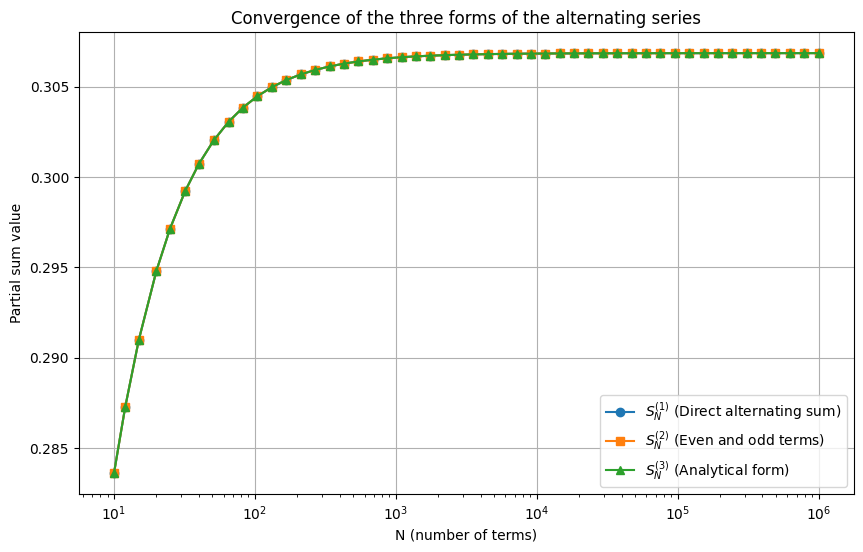

In [20]:
# N values (logarithmically spaced)
N_values = np.logspace(1, 6, num=50, dtype=int)

# Calculate the sums for each N
S1_values = [S1(N) for N in N_values]
S2_values = [S2(N) for N in N_values]
S3_values = [S3(N) for N in N_values]

# Convergence plot
plt.figure(figsize=(10, 6))
plt.semilogx(N_values, S1_values, 'o-', label='$S_N^{(1)}$ (Direct alternating sum)')
plt.semilogx(N_values, S2_values, 's-', label='$S_N^{(2)}$ (Even and odd terms)')
plt.semilogx(N_values, S3_values, '^-', label='$S_N^{(3)}$ (Analytical form)')
plt.xlabel('N (number of terms)')
plt.ylabel('Partial sum value')
plt.title('Convergence of the three forms of the alternating series')
plt.legend()
plt.grid()
plt.show()

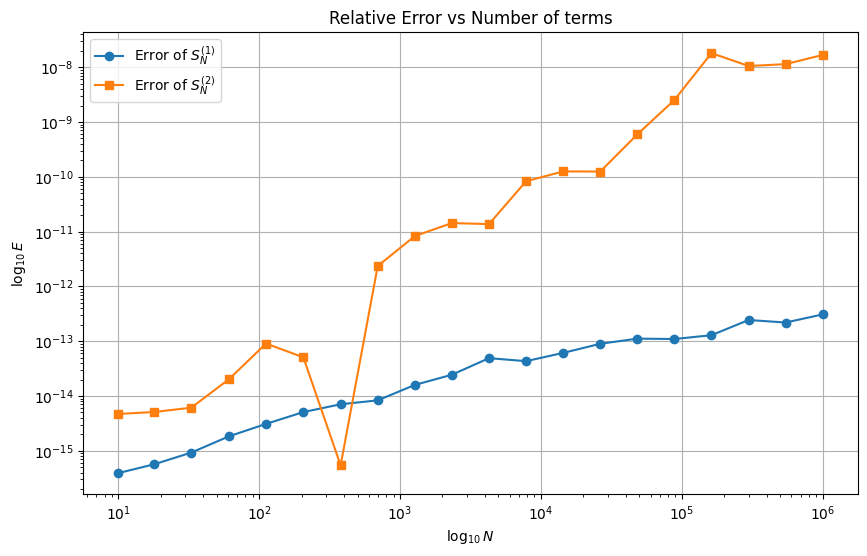

In [21]:
N_values = np.logspace(1, 6, 20, dtype=int)  # N values from 10^1 to 10^6
E1 = []
E2 = []

for N in N_values:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)
    E1.append(abs((s1 - s3)/s3))
    E2.append(abs((s2 - s3)/s3))

plt.figure(figsize=(10, 6))
plt.loglog(N_values, E1, 'o-', label=r'Error of $S_N^{(1)}$')
plt.loglog(N_values, E2, 's-', label=r'Error of $S_N^{(2)}$')
plt.xlabel(r'$\log_{10} N$')
plt.ylabel(r'$\log_{10} E$')
plt.legend()
plt.grid()
plt.title('Relative Error vs Number of terms')
plt.show()

## Binomial Series
The Taylor series for the function $(1+x)^\alpha$, known as the binomial series, centered at $a=0$ is given by:
$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$
where $\binom{\alpha}{n}$ is the generalized binomial coefficient.

Consider the case where $\alpha = 1/2$, which gives us the Taylor series for $\sqrt{1+x}$:
$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

- Find the approximation for $x = 0.5$ by changing the number of terms included in the sum. What can you conclude about the convergence of the series for this value of $x$?
- Find the relative and percentage error for each approximation, using the actual value of $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$. 
- Plot the values associated with the series after each iteration. Show how the series approaches the actual value as more terms are included.
- Using the tolerance criterion, evaluate 6 to 7 different values, and find how many terms are needed to reach that resolution. Create a plot of the system's evolution.

In [22]:
def binomial_coefficient(alpha, n):
    """Calculate generalized binomial coefficient (alpha choose n)"""
    if n == 0:
        return 1
    result = 1
    for i in range(n):
        result *= (alpha - i)
    return result / factorial(n)

def taylor_binomial_approximation(x, alpha, n_terms):
    """Calculate Taylor series approximation for (1+x)^alpha"""
    approximation = 0
    for n in range(n_terms):
        approximation += binomial_coefficient(alpha, n) * (x ** n)
    return approximation

In [23]:
# Parameters
x = 0.5
alpha = 0.5
max_terms = 20
actual_value = np.sqrt(1+x)

# Calculate approximations for different numbers of terms
results = []
approximations = []

for n_terms in range(1, max_terms + 1):
    approx = taylor_binomial_approximation(x, alpha, n_terms)
    approximations.append(approx)
    
    absolute_error = abs(actual_value - approx)
    relative_error = absolute_error / actual_value
    percentage_error = relative_error * 100
    
    results.append({
        'Terms': n_terms,
        'Approximation': approx,
        'Absolute_Error': absolute_error,
        'Relative_Error': relative_error,
        'Percentage_Error': percentage_error
    })

In [24]:
# Create DataFrame
df = pd.DataFrame(results)
df

,Terms,Approximation,Absolute_Error,Relative_Error,Percentage_Error
0,1,1.000000,2.247449e-01,1.835034e-01,1.835034e+01
1,2,1.250000,2.525513e-02,2.062073e-02,2.062073e+00
2,3,1.218750,5.994871e-03,4.894792e-03,4.894792e-01
3,4,1.226562,1.817629e-03,1.484088e-03,1.484088e-01
4,5,1.224121,6.237776e-04,5.093123e-04,5.093123e-02
5,6,1.224976,2.307145e-04,1.883776e-04,1.883776e-02
6,7,1.224655,8.972002e-05,7.325609e-05,7.325609e-03
7,8,1.224781,3.616499e-05,2.952859e-05,2.952859e-03
8,9,1.224730,1.497580e-05,1.222769e-05,1.222769e-03
9,10,1.224751,6.332861e-06,5.170759e-06,5.170759e-04


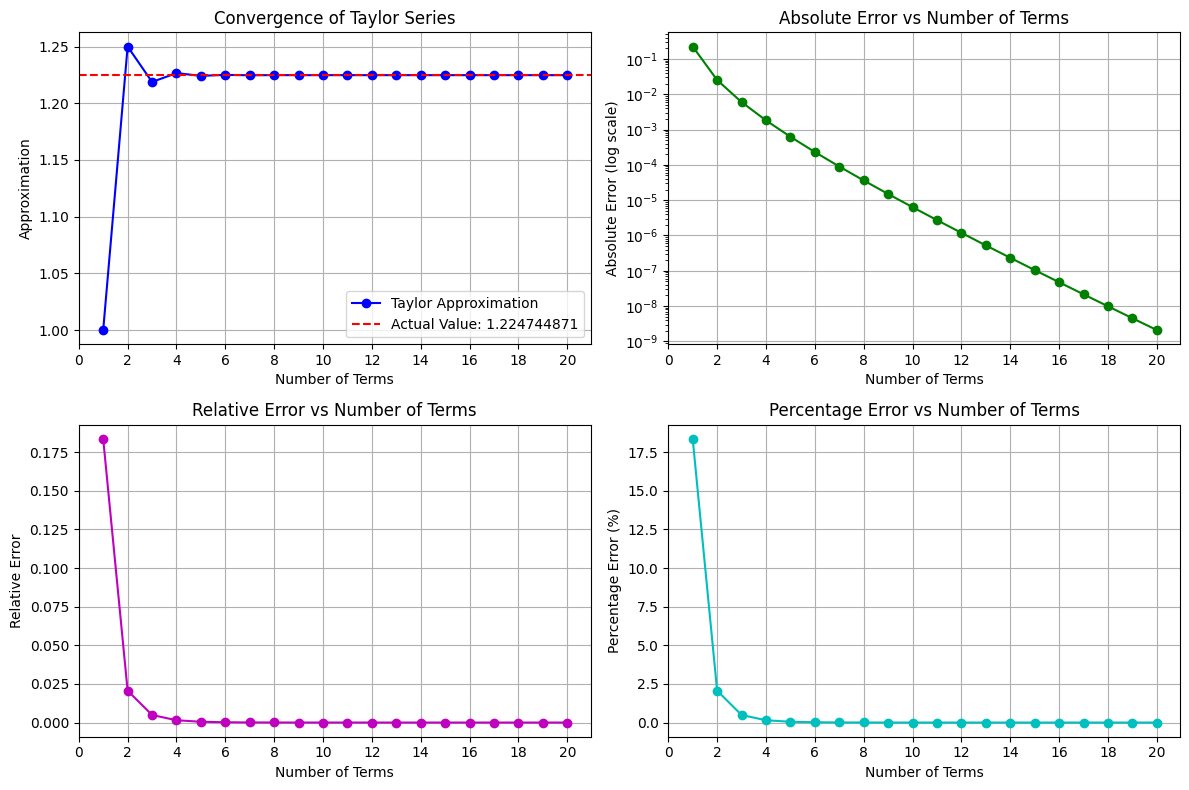

In [25]:
# Plot convergence
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Terms'], df['Approximation'], 'bo-', label='Taylor Approximation')
plt.axhline(y=actual_value, color='r', linestyle='--', label=f'Actual Value: {actual_value:.9f}')
plt.xlabel('Number of Terms')
plt.ylabel('Approximation')
plt.title('Convergence of Taylor Series')
plt.legend()
plt.grid()
plt.xticks(range(0,max_terms + 1, 2))

plt.subplot(2, 2, 2)
plt.semilogy(df['Terms'], df['Absolute_Error'], 'go-')
plt.xlabel('Number of Terms')
plt.ylabel('Absolute Error (log scale)')
plt.title('Absolute Error vs Number of Terms')
plt.grid()
plt.xticks(range(0,max_terms + 1, 2))

plt.subplot(2, 2, 3)
plt.plot(df['Terms'], df['Relative_Error'], 'mo-')
plt.xlabel('Number of Terms')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Number of Terms')
plt.grid()
plt.xticks(range(0,max_terms + 1, 2))

plt.subplot(2, 2, 4)
plt.plot(df['Terms'], df['Percentage_Error'], 'co-')
plt.xlabel('Number of Terms')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error vs Number of Terms')
plt.grid()
plt.xticks(range(0,max_terms + 1, 2))

plt.tight_layout()
plt.show()

In [26]:
# Tolerance analysis
def terms_needed_for_tolerance(x, alpha, tolerance):
    """Find number of terms needed to reach given tolerance"""
    n_terms = 1
    while True:
        approx = taylor_binomial_approximation(x, alpha, n_terms)
        error = abs(actual_value - approx)
        if error <= tolerance:
            return n_terms, approx, error
        n_terms += 1
        if n_terms > 100:  # Safety limit
            return n_terms, approx, error

# Test different tolerance values
tolerances = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
tolerance_results = []

for tol in tolerances:
    terms, final_approx, final_error = terms_needed_for_tolerance(x, alpha, tol)
    tolerance_results.append({
        'Tolerance': tol,
        'Terms_Needed': terms,
        'Final_Approximation': final_approx,
        'Final_Error': final_error
    })

# Create DataFrame for tolerance analysis
tolerance_df = pd.DataFrame(tolerance_results)
tolerance_df

,Tolerance,Terms_Needed,Final_Approximation,Final_Error
0,1.000000e-02,3,1.218750,5.994871e-03
1,1.000000e-03,5,1.224121,6.237776e-04
2,1.000000e-04,7,1.224655,8.972002e-05
3,1.000000e-05,10,1.224751,6.332861e-06
4,1.000000e-06,13,1.224744,5.235943e-07
5,1.000000e-07,16,1.224745,4.734141e-08
6,1.000000e-08,18,1.224745,9.859308e-09


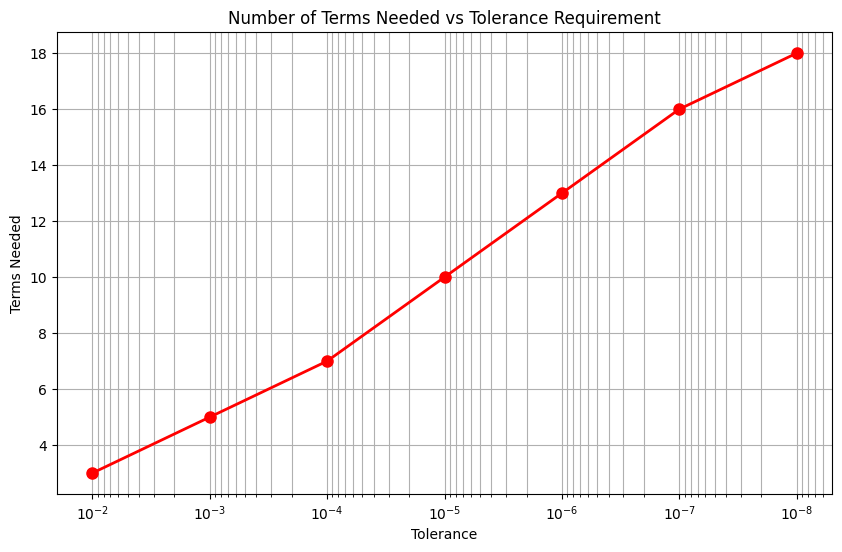

In [27]:
# Plot tolerance analysis
plt.figure(figsize=(10, 6))
plt.semilogx(tolerance_df['Tolerance'], tolerance_df['Terms_Needed'], 'ro-', linewidth=2, markersize=8)
plt.xlabel('Tolerance')
plt.ylabel('Terms Needed')
plt.title('Number of Terms Needed vs Tolerance Requirement')
plt.grid(True, which="both", ls="-")
plt.gca().invert_xaxis()  # Smaller tolerance on right
plt.show()